In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def pca_decide_how_many_features(X):
    
    #standard scale X
    drug_features = X.columns
    standardscaler = StandardScaler()    
    X = pd.DataFrame(standardscaler.fit_transform(X), columns = drug_features)
    print(X)
    
    #pca X    
    pca = PCA()
    pca.fit(X)
    V = pca.components_
    W = pd.DataFrame(V.T,
                 index=drug_features,
                 columns=[f'PC{i}' for i in range(1, V.shape[0]+1)])
    
    X_proj = pca.transform(X)
    X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, V.shape[0]+1)])
    print(X_proj)
    
    #Calculate PC
    eig_vals, eig_vecs = np.linalg.eig(np.dot(X.T,X))
    W = pd.DataFrame(eig_vecs, index=drug_features, columns=[f'PC{i}' for i in range(1, eig_vecs.shape[0] + 1)])
    print(W)
    
    #plot elbow
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal Component'); plt.ylabel('% explained variance')
    plt.show();
    
    #plot cumsum of explained variance
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.ylim(ymin=0)
    plt.title('cumulated share of explained variance')
    plt.xlabel('# of principal component used')
    plt.show();

In [3]:
def pca(X, n):
    pca_n = PCA(n_components = n)
    
    # Project data into n dimensions
    X_proj = pd.DataFrame(pca_n.fit_transform(X), columns=[f'PC{i}' for i in range(1, n+1)])
    
    return X_proj

In [4]:
def encode(y):
    labelencoder = LabelEncoder()
    y = labelencoder.fit_transform(y)
    return y

In [5]:
df2 = pd.read_csv("drug_features.csv").drop(columns = "Unnamed: 0")

/tmp/ipykernel_3972/2502600361.py:1: DtypeWarning: Columns (137,146,164,173,182,200,218,227,235,236,237,238,239,240,241,242,243,343,344,353,362,380,389,398,416,434,443,451,459,483,491,499,515,531,539,547,555,579,587,595,611,627,635,817,818,869,885,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1350,1767,1795,1796,1798) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("drug_features.csv").drop(columns = "Unnamed: 0")


In [6]:
list1 = list(df2.select_dtypes("object").keys()[1:])

In [7]:
df2 = df2.drop(columns = list1)

In [8]:
X = df2.drop(columns = "Drug1")
y = df2["Drug1"]

          ABC     ABCGG      nAcid     nBase  nAromAtom  nAromBond     nAtom  \
0   -0.090593  0.004298   0.690544  0.322433  -0.355252  -0.376250 -0.276111   
1   -1.045120 -0.912827  -0.408617 -0.685785  -1.335110  -1.330035 -1.238854   
2   -0.109566 -0.184219  -0.408617 -0.685785  -0.355252  -0.376250 -0.204797   
3   -0.642469 -0.684712   0.690544 -0.685785   0.297987   0.418571 -0.668340   
4    0.358435  0.354692  -0.408617 -0.685785  -1.335110  -1.330035  0.401374   
..        ...       ...        ...       ...        ...        ...       ...   
611  4.779686  4.997124  10.582992 -0.685785  -1.335110  -1.330035  3.360916   
612 -0.646233 -0.695103  -0.408617  2.338870  -0.355252  -0.376250 -0.953597   
613 -0.843665 -0.755110  -0.408617  0.322433  -1.335110  -1.330035 -0.490054   
614 -1.846313 -2.077294  -0.408617 -0.685785  -1.335110  -1.330035 -1.702396   
615  0.218377  0.314563  -0.408617  0.322433   0.461297   0.418571  0.223089   

     nHeavyAtom    nSpiro  nBridgehead 

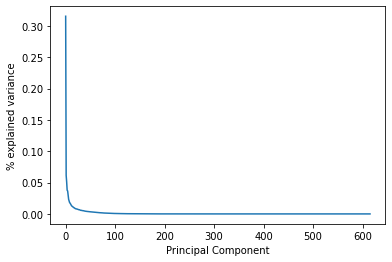

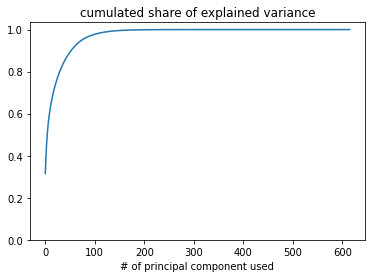

In [9]:
pca_decide_how_many_features(X)

In [10]:
pca(X, 3)

,PC1,PC2,PC3
0,-5.955056e+08,-4.474789e+07,-2.409408e+06
1,-5.955068e+08,-4.474811e+07,-2.409372e+06
2,-5.955055e+08,-4.474785e+07,-2.409405e+06
3,-5.955065e+08,-4.474799e+07,-2.409389e+06
4,-5.955051e+08,-4.474787e+07,-2.409466e+06
...,...,...,...
611,-5.954603e+08,-4.475087e+07,-2.409661e+06
612,-5.955066e+08,-4.474802e+07,-2.409382e+06
613,-5.955067e+08,-4.474805e+07,-2.409397e+06
614,-5.955070e+08,-4.474817e+07,-2.409368e+06


In [11]:
encode(y)

array([265,  21, 172, 241, 182, 337, 598, 233, 532,  85,  33,  67, 247,
        35, 121, 588, 360, 166, 351, 437, 151, 347, 564, 169, 158, 201,
       111, 573, 518, 313,  24, 145, 323, 361, 488, 100, 493, 583, 497,
       348, 315, 250, 134, 401, 210, 392,  51, 452, 108, 302,  46, 177,
       541,  64, 187, 439,  72, 414, 176, 208, 565, 609, 528, 410, 346,
       368, 586, 424, 501, 567, 554, 278, 602,  77,  10, 397, 286, 319,
         2, 236,  13, 328, 332, 589, 570, 613,  15, 485, 350, 308, 245,
       357, 240, 124, 441, 231, 542, 170,  30,  81, 527, 507, 534, 409,
       562, 125, 113,  83, 489, 373, 593, 575, 500, 463,  27, 174, 386,
        93, 276, 480, 202, 516, 400, 543, 492, 106,   6, 442, 387, 137,
       375, 557, 326,  19,  37, 336, 155, 412,  23, 114, 503, 530,  60,
       253, 339, 519,  86, 499, 453, 262, 572, 181, 249, 544, 197, 358,
       349, 509, 128, 362, 273, 581, 183, 341, 333, 510, 384, 364, 438,
       150, 343, 258, 502, 615, 214, 129, 522, 269, 126, 212, 53